Download the dataset from here  -> https://archive.ics.uci.edu/ml/datasets/Hepatitis

### Data Science Project

Question
Predict if a patient will live or die with Hepatitis based on the parameters using ML

### Workflow
- Data Preprossing
- EDA
- Feature Selection
- Build Model
- Interpret Model
- Serialization
- Deploy to production with Streamlit

## Load packages

In [6]:
import pandas as pd 
import numpy as np

# visualization package
import matplotlib.pyplot as plt
import seaborn as sns 

### Data Attribute Information:

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes

## Load Dataset

In [7]:
hepatitis_df = pd.read_csv('G:\\ML\\hepatitis\\train-model\data\hepatitis.data')

In [8]:
# Preview the first five row
hepatitis_df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [9]:
# add the columns names
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM",
             "SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME",
             "HISTOLOGY"]

In [10]:
hepatitis_df = pd.read_csv('G:\\ML\\hepatitis\\train-model\data\hepatitis.data', names=col_names)

In [11]:
# Preview the first five row
hepatitis_df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [12]:
# change columns name to small letter
hepatitis_df.columns = hepatitis_df.columns.str.lower().str.replace(' ', '_')

In [13]:
# Preview the first five row
hepatitis_df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [14]:
# Check out Data Types, memory usage, no of rows
hepatitis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
class              155 non-null int64
age                155 non-null int64
sex                155 non-null int64
steroid            155 non-null object
antivirals         155 non-null int64
fatigue            155 non-null object
malaise            155 non-null object
anorexia           155 non-null object
liver_big          155 non-null object
liver_firm         155 non-null object
spleen_palpable    155 non-null object
spiders            155 non-null object
ascites            155 non-null object
varices            155 non-null object
bilirubin          155 non-null object
alk_phosphate      155 non-null object
sgot               155 non-null object
albumin            155 non-null object
protime            155 non-null object
histology          155 non-null int64
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


In [15]:
# size of the data 
hepatitis_df.shape

(155, 20)

In [16]:
# check for missing value
hepatitis_df.isna().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [17]:
# check the number of unique values
for cols in hepatitis_df.columns:
    print(cols.capitalize(), 'have ', hepatitis_df[cols].nunique(), 'unique values: \n', hepatitis_df[cols].unique())

Class have  2 unique values: 
 [2 1]
Age have  49 unique values: 
 [30 50 78 31 34 51 23 39 32 41 47 38 66 40 22 27 42 25 49 58 61 62 26 35
 37 20 65 52 33 56 28 36 44 64 45 57 24 67 59 60 48 54  7 69 72 70 46 53
 43]
Sex have  2 unique values: 
 [2 1]
Steroid have  3 unique values: 
 ['1' '2' '?']
Antivirals have  2 unique values: 
 [2 1]
Fatigue have  3 unique values: 
 ['2' '1' '?']
Malaise have  3 unique values: 
 ['2' '1' '?']
Anorexia have  3 unique values: 
 ['2' '1' '?']
Liver_big have  3 unique values: 
 ['1' '2' '?']
Liver_firm have  3 unique values: 
 ['2' '1' '?']
Spleen_palpable have  3 unique values: 
 ['2' '1' '?']
Spiders have  3 unique values: 
 ['2' '1' '?']
Ascites have  3 unique values: 
 ['2' '1' '?']
Varices have  3 unique values: 
 ['2' '?' '1']
Bilirubin have  35 unique values: 
 ['1.00' '0.90' '0.70' '?' '1.30' '2.20' '2.00' '1.20' '0.60' '0.40' '0.80'
 '1.40' '2.30' '0.50' '0.30' '4.60' '1.80' '3.50' '4.10' '1.60' '2.80'
 '1.50' '2.50' '3.00' '4.80' '2.40' '1.

**As we can see there are question mark as values  in many columns**

**Hence we need to replace them with some value**

In [18]:
# Replace question mark with the most occuring value in that column
for cols in hepatitis_df.columns:
    count = hepatitis_df[cols].value_counts().index
    if count[0] != '?':
        hepatitis_df[cols] = hepatitis_df[cols].replace('?', count[0])
    else:
        print(cols)
        hepatitis_df[cols] = hepatitis_df[cols].replace('?', count[1])

alk_phosphate
protime


In [19]:
# check if there is any question mark
for cols in hepatitis_df.columns:
    print(cols.capitalize(), 'have ', hepatitis_df[cols].nunique(), 'unique values: \n', hepatitis_df[cols].unique())

Class have  2 unique values: 
 [2 1]
Age have  49 unique values: 
 [30 50 78 31 34 51 23 39 32 41 47 38 66 40 22 27 42 25 49 58 61 62 26 35
 37 20 65 52 33 56 28 36 44 64 45 57 24 67 59 60 48 54  7 69 72 70 46 53
 43]
Sex have  2 unique values: 
 [2 1]
Steroid have  2 unique values: 
 ['1' '2']
Antivirals have  2 unique values: 
 [2 1]
Fatigue have  2 unique values: 
 ['2' '1']
Malaise have  2 unique values: 
 ['2' '1']
Anorexia have  2 unique values: 
 ['2' '1']
Liver_big have  2 unique values: 
 ['1' '2']
Liver_firm have  2 unique values: 
 ['2' '1']
Spleen_palpable have  2 unique values: 
 ['2' '1']
Spiders have  2 unique values: 
 ['2' '1']
Ascites have  2 unique values: 
 ['2' '1']
Varices have  2 unique values: 
 ['2' '1']
Bilirubin have  34 unique values: 
 ['1.00' '0.90' '0.70' '1.30' '2.20' '2.00' '1.20' '0.60' '0.40' '0.80'
 '1.40' '2.30' '0.50' '0.30' '4.60' '1.80' '3.50' '4.10' '1.60' '2.80'
 '1.50' '2.50' '3.00' '4.80' '2.40' '1.70' '1.10' '3.20' '2.90' '8.00'
 '3.90' '1.9

In [20]:
# change this two column data type to float
hepatitis_df[['bilirubin','albumin']] = hepatitis_df[['bilirubin','albumin']].astype(float)

In [21]:
# change the data type to int
for cols in hepatitis_df.columns:
    if cols != 'bilirubin' and cols != 'albumin':
        hepatitis_df[cols] = hepatitis_df[cols].astype(int)

In [22]:
# check the data typ
hepatitis_df.dtypes

class                int32
age                  int32
sex                  int32
steroid              int32
antivirals           int32
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int32
dtype: object

In [23]:
### Count of each row
hepatitis_df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

## Exploratoy Data Analysis

In [24]:
# stastical aggregation of dataset
hepatitis_df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.509677,1.845161,1.348387,1.606452,1.793548,1.838710,1.612903,1.806452,1.670968,1.870968,1.883871,1.410968,101.522581,84.193548,3.836129,78.341935,1.451613
std,0.406070,12.565878,0.305240,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,1.191178,47.082042,89.097648,0.619267,25.594348,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,30.500000,3.500000,57.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,55.000000,4.000000,100.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,100.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [25]:
# Value counts for target varaible
# DIE: 1
# LIVE: 2

hepatitis_df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

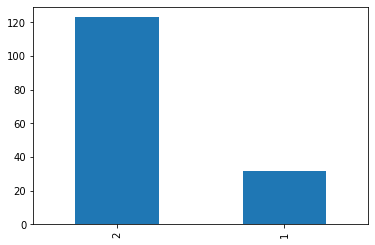

In [26]:
# plot the count
hepatitis_df['class'].value_counts().plot(kind='bar')

In [27]:
### How many are males(1) and females(2)
hepatitis_df['sex'].unique()

array([2, 1], dtype=int64)

In [28]:
# check the count
hepatitis_df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

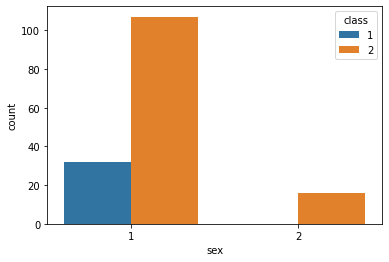

In [29]:
# mortality rate when compar with gender
sns.countplot(x='sex', hue='class', data=hepatitis_df)

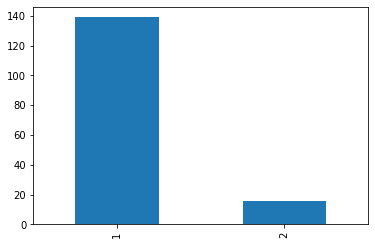

In [30]:
# plot the count
hepatitis_df['sex'].value_counts().plot.bar()

- There are more males than females in ourdataset

In [31]:
### check Age Range
hepatitis_df.groupby(['age', 'sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

## Frequency Distribution Table using the Age Range

In [32]:
hepatitis_df['age'].agg(['max', 'min'])

max    78
min     7
Name: age, dtype: int64

#### Bucket the age

In [33]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins= [0,10,20,30,40,50,60,70,80]

frequency =  hepatitis_df.groupby(pd.cut(hepatitis_df['age'], bins=bins, labels=labels)).size()

frequency

age
Less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and more      2
dtype: int64

In [34]:
frequency = frequency.reset_index(name='count')
frequency

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


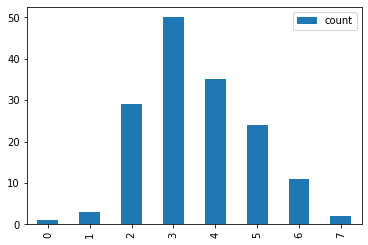

In [35]:
frequency.plot(kind='bar')

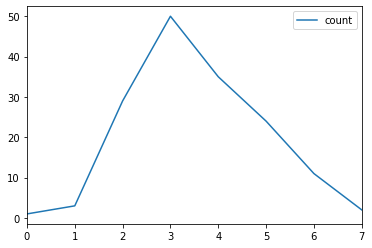

In [36]:
frequency.plot.line()

- Highest prevalence of Hepatitis is from 30-40 followed by 40-50
-The least is individual under 10, and elderly above 70
-----------------------------------------------------------------------

#### Checking for Outliers
- Univariate Analysis
-Multivariate Analysis

#### Methods
- Boxplot(Uni)
-Scatterplot (Multi)
-Z-score
-IQR Interquartile Range

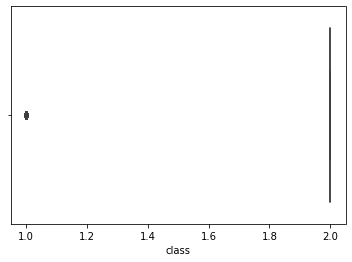

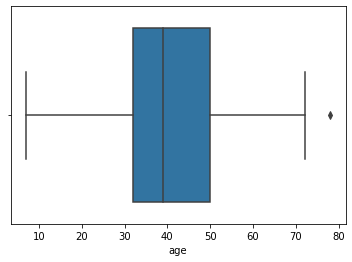

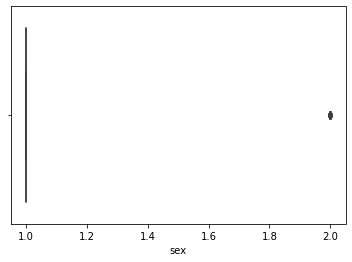

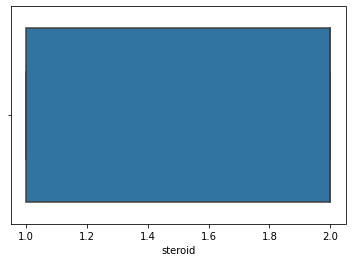

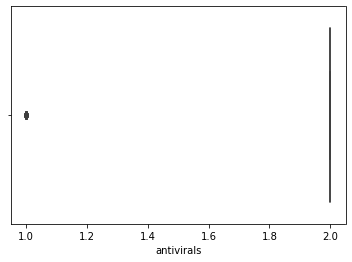

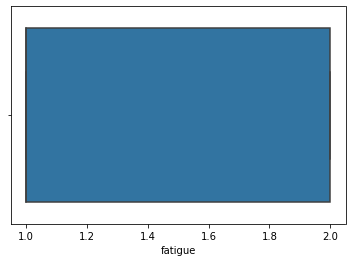

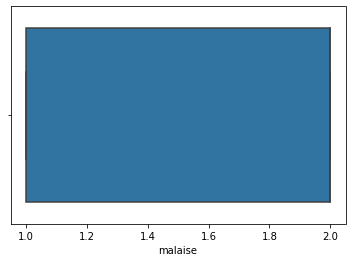

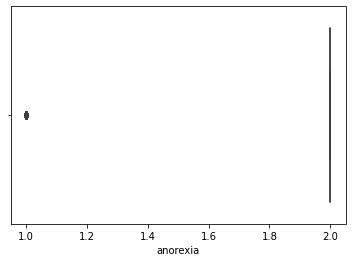

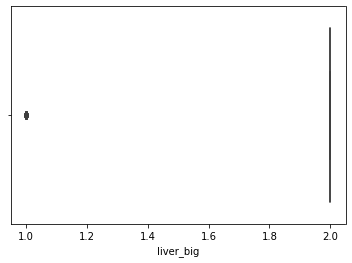

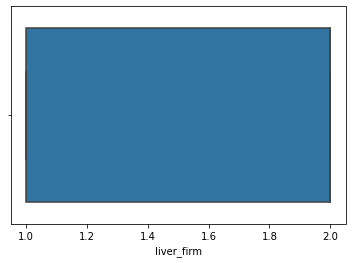

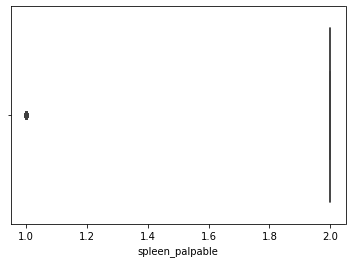

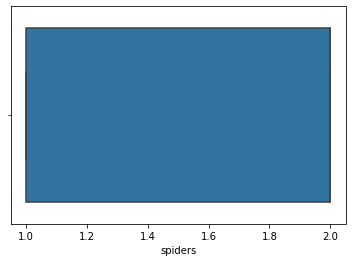

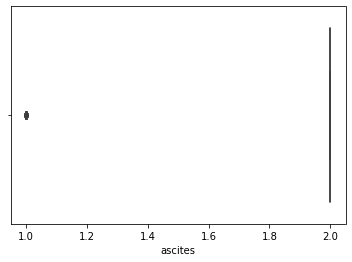

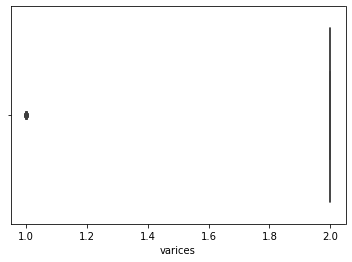

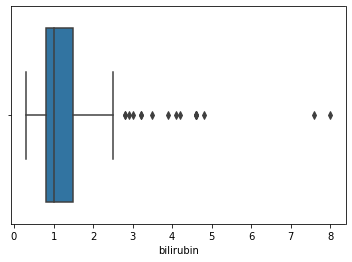

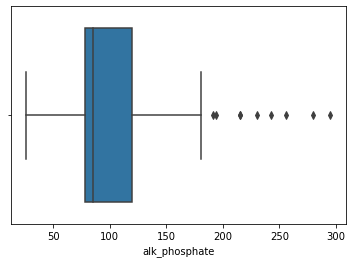

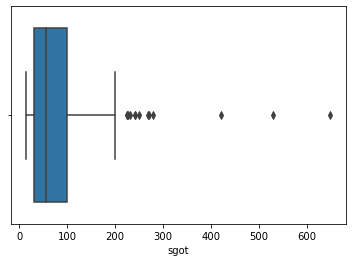

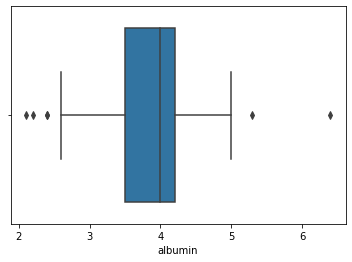

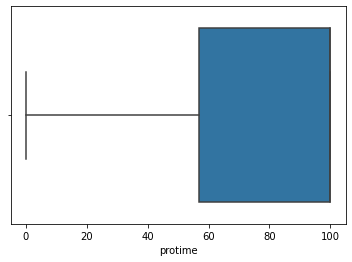

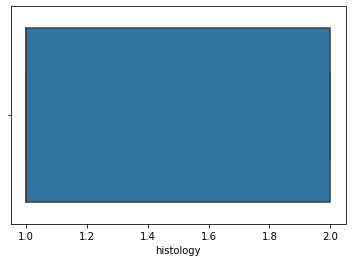

In [37]:
# box plot
for cols in hepatitis_df.columns:
    sns.boxplot(hepatitis_df[cols])
    plt.show()

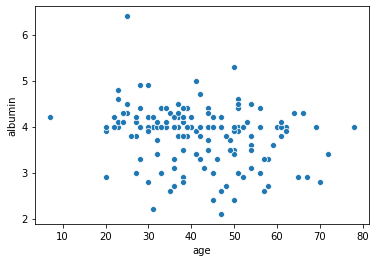

In [38]:
# Scatterplot
sns.scatterplot(hepatitis_df['age'],hepatitis_df['albumin'])

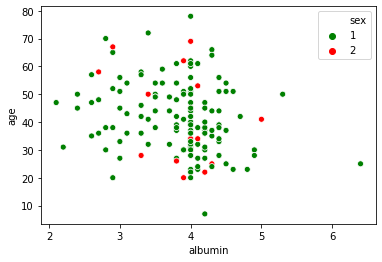

In [39]:
# Scatter plot
sns.scatterplot(x='albumin',y='age',hue='sex', palette=['green','red'],data=hepatitis_df)

#### using Interquartile Range(IQR)
- H-Spread/Mid_spread
-Measures the statistical dispersion/spread
-IQR = Quantile 3(75) - Quantile 1(25)

In [40]:
q2 = hepatitis_df.quantile(.25)
q3 = hepatitis_df.quantile(.75)

IQR = q3 - q2

IQR

class               0.0
age                18.0
sex                 0.0
steroid             1.0
antivirals          0.0
fatigue             1.0
malaise             1.0
anorexia            0.0
liver_big           0.0
liver_firm          1.0
spleen_palpable     0.0
spiders             1.0
ascites             0.0
varices             0.0
bilirubin           0.7
alk_phosphate      41.5
sgot               68.5
albumin             0.7
protime            43.0
histology           1.0
dtype: float64

In [41]:
(hepatitis_df < (q2 - 1.5 * IQR )) | (hepatitis_df > (q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- The data points with true are the outlier

#### Solution
- Remove
-Change
-Ignore

In [42]:
# hepatitis_df = hepatitis_df[~((hepatitis_df < (q2 - 1.5 * IQR )) | (hepatitis_df > (q3 + 1.5 * IQR))).any(axis=1)]

In [43]:
# hepatitis_df.shape

### Feature Selection and Importance

- SelectKbest
   - Strong relation with the output/target
- Recursive Feature Elimination

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2

In [45]:
# seperate predictor and target

xfeatures = hepatitis_df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = hepatitis_df['class']

In [46]:
# featue selection
chi_sq = SelectKBest(chi2, k=10)
best_features = chi_sq.fit(xfeatures, ylabels)

In [47]:
# 10 selected featues 
best_features = xfeatures.columns[best_features.get_support()]
best_features

Index(['age', 'fatigue', 'malaise', 'spiders', 'bilirubin', 'alk_phosphate',
       'sgot', 'albumin', 'protime', 'histology'],
      dtype='object')

#### Recursive Feature Elimination

In [48]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfe_feautue =  RFE(RandomForestClassifier(), n_features_to_select=10)
rfe_feautue.fit(xfeatures, ylabels)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [50]:
# selected features
rfe_feautue = xfeatures.columns[rfe_feautue.support_]
rfe_feautue

Index(['age', 'malaise', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

### Checking for Feature Importance
- ExtraTreeClassifier
-Which feature is important

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

In [52]:
# initialize and fit the data
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures,ylabels)

ExtraTreesClassifier()

In [53]:
# Print Important
print(et_clf.feature_importances_)

[0.0638622  0.01945311 0.02768592 0.01002706 0.02057797 0.05291739
 0.02727365 0.0256992  0.04783438 0.03701915 0.07893073 0.11034695
 0.05975991 0.10160584 0.07451599 0.05950046 0.0700231  0.06586344
 0.04710355]


In [54]:
feature_imporance_df = pd.Series(et_clf.feature_importances_,index=xfeatures.columns)
feature_imporance_df

age                0.063862
sex                0.019453
steroid            0.027686
antivirals         0.010027
fatigue            0.020578
malaise            0.052917
anorexia           0.027274
liver_big          0.025699
liver_firm         0.047834
spleen_palpable    0.037019
spiders            0.078931
ascites            0.110347
varices            0.059760
bilirubin          0.101606
alk_phosphate      0.074516
sgot               0.059500
albumin            0.070023
protime            0.065863
histology          0.047104
dtype: float64

In [55]:
feature_imporance_df = feature_imporance_df.nlargest(n=10)
feature_imporance_df

ascites          0.110347
bilirubin        0.101606
spiders          0.078931
alk_phosphate    0.074516
albumin          0.070023
protime          0.065863
age              0.063862
varices          0.059760
sgot             0.059500
malaise          0.052917
dtype: float64

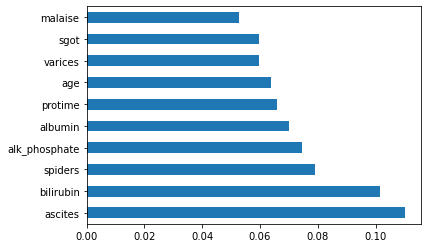

In [56]:
# plot the importance
feature_imporance_df.plot(kind='barh')

In [57]:
# Correlation
hepatitis_df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.137413,-0.130196,0.306049,0.339530,0.133638,-0.093665,0.020057,0.234261,0.389137,0.469334,0.362385,-0.445012,-0.125083,-0.061167,0.455927,0.202396,-0.337856
age,-0.219647,1.000000,0.008126,-0.090466,-0.013100,-0.278701,-0.117876,0.088317,-0.089629,-0.092001,-0.061277,-0.156545,-0.055314,-0.039229,0.115205,0.017954,0.078884,-0.237422,-0.115622,0.170780
sex,0.173051,0.008126,1.000000,-0.048985,-0.089249,-0.070059,-0.030523,0.015886,-0.081830,-0.078642,-0.048478,-0.033192,0.130587,0.056792,-0.051354,0.099693,-0.011006,0.007624,-0.066886,-0.137450
steroid,0.137413,-0.090466,-0.048985,1.000000,0.043961,0.175451,0.240139,0.073644,0.201478,0.068376,0.074816,0.027290,-0.031046,-0.073548,-0.043113,-0.050403,-0.033901,0.203763,0.033887,-0.095367
antivirals,-0.130196,-0.013100,-0.089249,0.043961,1.000000,-0.061339,-0.016251,-0.042072,0.054746,0.099213,-0.164548,-0.147909,-0.164747,-0.155148,0.181197,0.167796,0.098931,-0.156971,0.204972,0.209242
fatigue,0.306049,-0.278701,-0.070059,0.175451,-0.061339,1.000000,0.589030,0.372957,0.099759,0.247505,0.186846,0.367948,0.281439,0.180511,-0.272476,-0.151831,-0.194467,0.308189,0.173314,-0.146579
malaise,0.339530,-0.117876,-0.030523,0.240139,-0.016251,0.589030,1.000000,0.600545,0.041697,0.091832,0.006470,0.307173,0.320228,0.161422,-0.300650,-0.194481,-0.207019,0.286767,0.181620,-0.144667
anorexia,0.133638,0.088317,0.015886,0.073644,-0.042072,0.372957,0.600545,1.000000,0.079685,0.052781,0.032536,0.287366,0.184053,0.163378,-0.298684,-0.123724,-0.231133,0.156385,-0.021279,-0.081623
liver_big,-0.093665,-0.089629,-0.081830,0.201478,0.054746,0.099759,0.041697,0.079685,1.000000,0.479779,0.095959,0.215566,-0.116465,-0.049453,0.008483,-0.142757,0.041644,-0.053902,-0.079382,-0.060262
liver_firm,0.020057,-0.092001,-0.078642,0.068376,0.099213,0.247505,0.091832,0.052781,0.479779,1.000000,0.180607,0.345553,0.010196,0.208047,-0.045090,-0.354953,-0.107440,0.190284,0.135257,-0.157118


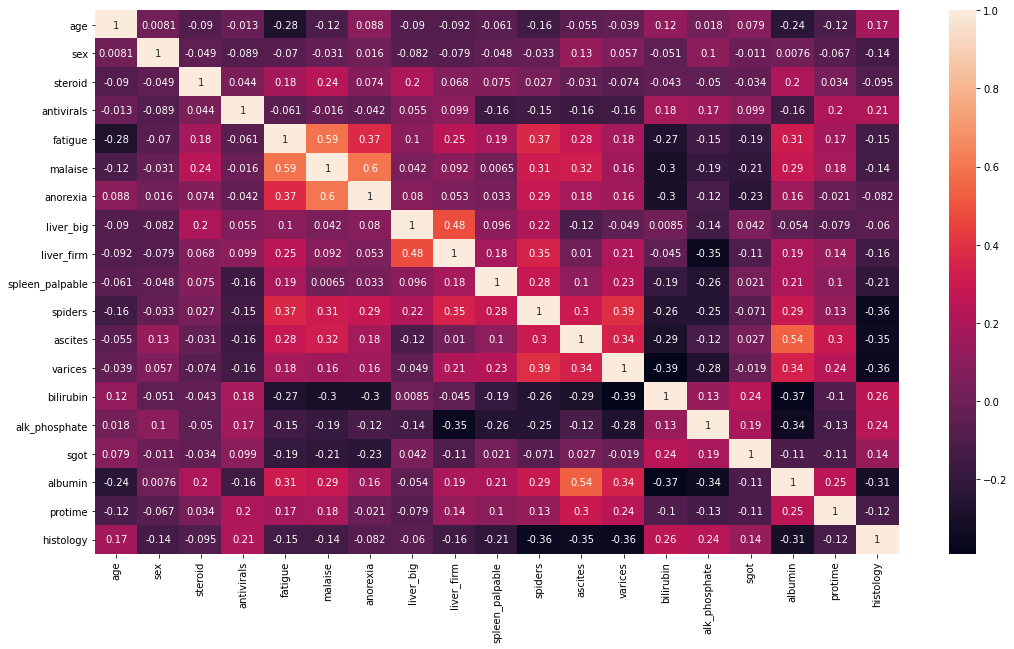

In [58]:
# Heatmap for Correlation
plt.figure(figsize=(18,10))
sns.heatmap(xfeatures.corr(), annot=True)

## Model Building
- Feature & Labels
-Train/Test/Split
- LogisticRegression, DT, RF, SVC
- Serialize

In [68]:
# load packages
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics to evaluate model
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


In [69]:
# we will use the feature by Extra tree classifier
hepatitis_df_final = hepatitis_df[feature_imporance_df.index]

hepatitis_df_final.head()

,ascites,bilirubin,spiders,alk_phosphate,albumin,protime,age,varices,sgot,malaise
0,2,1.0,2,85,4.0,100,30,2,18,2
1,2,0.9,2,135,3.5,100,50,2,42,2
2,2,0.7,2,96,4.0,100,78,2,32,2
3,2,0.7,2,46,4.0,80,31,2,52,2
4,2,1.0,2,85,4.0,100,34,2,200,2


In [70]:
# Independent and Dependent variable

x = hepatitis_df_final
y = hepatitis_df['class']

In [71]:
# train test split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=7)

In [72]:
# models
models = list()
lg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=130)
dt = DecisionTreeClassifier()

models = [lg,rf, dt]

In [73]:
score = []
for i in models:
    cv = cross_val_score(estimator=i ,X=x_train, y=y_train, cv=5, scoring='accuracy', n_jobs=-1)
    score.append(cv)
    print(cv)

[0.86363636 0.90909091 0.81818182 0.85714286 0.9047619 ]
[0.86363636 0.81818182 0.77272727 0.85714286 0.9047619 ]
[0.77272727 0.81818182 0.72727273 0.80952381 0.80952381]


## Building Mode

#### 1. Logistic Regression

In [74]:
logreg = LogisticRegression(max_iter=120)
logreg.fit(x_train,y_train)

# predict 
y_pedict_lr = logreg.predict(x_test)

C:\Users\Benai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [75]:
print('The precision score  on Test is : ',round(precision_score(y_test, y_pedict_lr) * 100,2), '%')
print('The accuracy score  on Test is : ',round(accuracy_score(y_test, y_pedict_lr) * 100,2), '%')
print ('\n\n Confusion Matrix TEST:\n', confusion_matrix(y_test, y_pedict_lr))

The precision score  on Test is :  75.0 %
The accuracy score  on Test is :  76.6 %


 Confusion Matrix TEST:
 [[ 3 10]
 [ 1 33]]


### 2. Decision Tree

In [76]:
parms = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3,4,5],
    'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [3,4,5,6],
    'max_features': [1,2,3,4],
    'random_state': [20,24,36]
}

gscv = GridSearchCV(DecisionTreeClassifier(), param_grid=parms, cv=5, scoring='accuracy', )

gscv.fit(x_train,y_train)

gscv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=4, min_samples_leaf=4,
                       min_samples_split=3, random_state=20)

In [120]:
# predict 
dtc = DecisionTreeClassifier(max_depth=3, max_features=4, min_samples_leaf=4, min_samples_split=3, random_state=20)

dtc.fit(x_train,y_train)

# predict 
y_pedict_dtc = dtc.predict(x_test)

In [121]:
print('The precision score  on Test is : ',round(precision_score(y_test, y_pedict_dtc) * 100,2), '%')
print('The accuracy score  on Test is : ',round(accuracy_score(y_test, y_pedict_dtc) * 100,2), '%')
print ('\n\n Confusion Matrix TEST:\n', confusion_matrix(y_test, y_pedict_dtc))

The precision score  on Test is :  57.14 %
The accuracy score  on Test is :  74.47 %


 Confusion Matrix TEST:
 [[ 4  9]
 [ 3 31]]


### 3. Randome Forest

In [122]:
rfc = RandomForestClassifier(n_estimators=160, min_samples_leaf=4)

rfc.fit(x_train,y_train)

# predict 
y_pedict_rfc = rfc.predict(x_test)

In [123]:
print('The precision score  on Test is : ',round(precision_score(y_test, y_pedict_rfc) * 100,2), '%')
print('The accuracy score  on Test is : ',round(accuracy_score(y_test, y_pedict_rfc) * 100,2), '%')
print ('\n\n Confusion Matrix TEST:\n', confusion_matrix(y_test, y_pedict_rfc))

The precision score  on Test is :  75.0 %
The accuracy score  on Test is :  76.6 %


 Confusion Matrix TEST:
 [[ 3 10]
 [ 1 33]]


### 4. Support vector machine

In [124]:
sv = SVC(C=0.9, kernel='linear', probability=True)

sv.fit(x_train,y_train)

# predict 
y_pedict_sv = sv.predict(x_test)

In [125]:
print('The precision score  on Test is : ',round(precision_score(y_test, y_pedict_sv) * 100,2), '%')
print('The accuracy score  on Test is : ',round(accuracy_score(y_test, y_pedict_sv) * 100,2), '%')
print ('\n\n Confusion Matrix TEST:\n', confusion_matrix(y_test, y_pedict_sv))

The precision score  on Test is :  66.67 %
The accuracy score  on Test is :  76.6 %


 Confusion Matrix TEST:
 [[ 4  9]
 [ 2 32]]


### Save Our Model
- Serialization
- Pickle
- Joblib
- numpy/json/ray

In [126]:
# Using Joblib
import joblib

In [127]:
model_file = open("logistic_regression.pkl","wb")
joblib.dump(logreg,model_file)
model_file.close()

In [128]:
model_file_rfc = open("Random_forest_model.pkl","wb")
joblib.dump(rfc,model_file_rfc)
model_file_rfc.close()

In [129]:
model_file_dtc = open("decision_tree_clf_model.pkl","wb")
joblib.dump(dtc,model_file_dtc)
model_file_dtc.close()

In [130]:
model_file_sv = open("support_vector_model.pkl","wb")
joblib.dump(sv,model_file_sv)
model_file_sv.close()

In [131]:
# Create Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [132]:
feature_names_best = x.columns
target_names = ["Die","Live"]

In [133]:
# Create A Dot Plot
dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=feature_names_best, class_names=target_names)

In [134]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

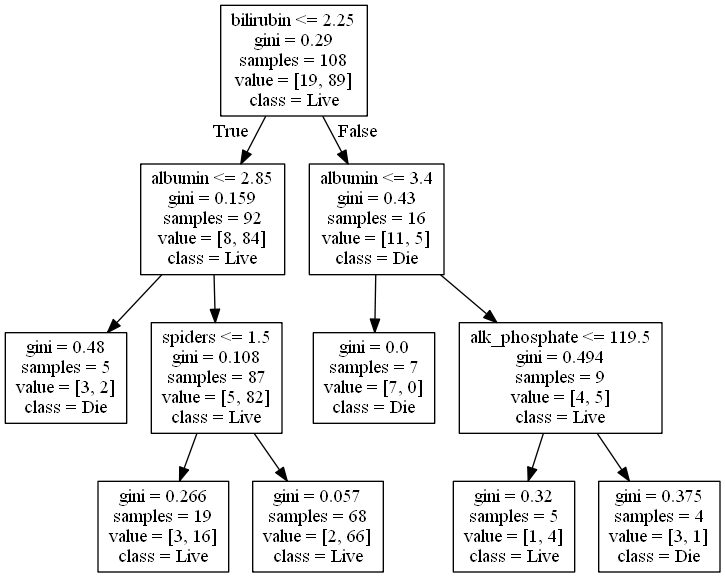

In [135]:
Image(graph.create_png())

In [136]:
# Save the plot
graph.write_png("hep_decisition_tree_plot.png")

True

### Interpret Model & Evaluate
- Eli5
- Lime

### Using Lime

In [137]:
# Intepreting with Lime
import lime
import lime.lime_tabular

In [138]:
# Methods and Attributes
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

# Create Lime Explainer
- LimeTabularExplainer = Tables
- LimeTextExplainer = Text
- LimeImageExplainer = Images

In [139]:
feature_names_best

Index(['ascites', 'bilirubin', 'spiders', 'alk_phosphate', 'albumin',
       'protime', 'age', 'varices', 'sgot', 'malaise'],
      dtype='object')

In [140]:
target_names

['Die', 'Live']

In [141]:
class_names = ["Die(1)","Live(2)"]

In [142]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x.values,
                                                   feature_names=feature_names_best,
                                                   class_names=class_names,
                                                   discretize_continuous=True)

In [143]:
x_test.iloc[1]

ascites            2.0
bilirubin          2.0
spiders            1.0
alk_phosphate    167.0
albumin            3.3
protime          100.0
age               58.0
varices            2.0
sgot             242.0
malaise            2.0
Name: 76, dtype: float64

In [144]:
logreg.predict(np.array(x_test.iloc[1]).reshape(1,-1))

array([2])

In [145]:
exp = explainer.explain_instance(x_test.iloc[1], logreg.predict_proba, num_features=10, top_labels=1)

In [146]:
exp.show_in_notebook(show_table=True,show_all=False)

In [147]:
# Explanation as list
exp.as_list()

[('bilirubin > 1.50', -0.35463970439703346),
 ('spiders <= 1.00', -0.20287499321654548),
 ('albumin <= 3.50', -0.07481816009881861),
 ('alk_phosphate > 119.50', -0.07474208625032448),
 ('age > 50.00', -0.07179767293704684),
 ('sgot > 99.00', 0.014938169800632223),
 ('1.00 < malaise <= 2.00', 0.01315850179518859),
 ('57.00 < protime <= 100.00', 0.0066248808458703855),
 ('varices <= 2.00', 0.0),
 ('ascites <= 2.00', 0.0)]

### Using Eli5

In [148]:
import eli5

In [149]:
# Show how each feature contributes
eli5.show_weights(logreg,top=10)

In [150]:
feature_names_best = list(feature_names_best)

# Show how each feature contributes
eli5.show_weights(logreg, feature_names=feature_names_best, target_names=class_names)

Weight?,Feature
+0.835,ascites
+0.697,spiders
+0.453,albumin
+0.085,varices
+0.051,malaise
+0.001,sgot
+0.000,protime
-0.005,alk_phosphate
-0.023,age
-0.109,<BIAS>


In [151]:
# Show how each feature contributes
eli5.show_prediction(logreg,x_test.iloc[1], show_feature_values=True)

In [152]:
# check the weights
eli5.explain_weights(logreg)

Weight?,Feature
+0.835,x0
+0.697,x2
+0.453,x4
+0.085,x7
+0.051,x9
+0.001,x8
+0.000,x5
-0.005,x3
-0.023,x6
-0.109,<BIAS>


In [153]:
hepatitis_df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [154]:
hepatitis_df.to_csv('clean_hepatitis.csv', index=False)
frequency.to_csv('age_group_infection_rate.csv', index=False)